# Air Pollution Prediction Platform (Sarajevo) - Dataset Cleaning and Analysis

In [ ]:
# Dataset loading
import gdown
import pandas as pd

file_id = "1xnur6Jc6UEdaSo5806PgPuS1BtYRNzYi"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
gdown.download(url, "AQI Dataset.csv", quiet=False)
df = pd.read_csv("AQI Dataset.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=1xnur6Jc6UEdaSo5806PgPuS1BtYRNzYi
To: /content/AQI Dataset.csv
100%|██████████| 670k/670k [00:00<00:00, 69.8MB/s]


,date,pm25,pm10,o3,no2,so2,co,station
0,2025/11/1,65,22,40,9,2,,Bjelave
1,2025/11/2,58,12,40,10,1,,Bjelave
2,2025/11/3,32,21,24,10,5,1,Bjelave
3,2025/11/4,60,33,17,14,3,1,Bjelave
4,2025/11/5,79,47,14,17,4,3,Bjelave


# 1) Dataset Information

In [ ]:
df.info()
df.describe()
df['station'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19164 entries, 0 to 19163
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     19164 non-null  object
 1    pm25    19164 non-null  object
 2    pm10    19164 non-null  object
 3    o3      19164 non-null  object
 4    no2     19164 non-null  object
 5    so2     19164 non-null  object
 6    co      19164 non-null  object
 7   station  19164 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


array(['Bjelave', 'Otoka', 'Ilidza', 'Vijecnica', 'Ilijas', 'Ivan Sedlo',
       'US Embassy'], dtype=object)

# 2) Missing Values Analysis

In [ ]:
# Check for common missing value representations
df.isin(['NA', 'NaN', 'null', 'NULL', '--']).sum()

# Count empty string values
df.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()

# Clean column names and convert to appropriate data types
df.columns = df.columns.str.strip().str.lower()
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Check updated data types and missing values
df.dtypes
df.isna().sum()

/tmp/ipython-input-3343849216.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()


,0
date,0
pm25,3296
pm10,1684
o3,1924
no2,2946
so2,3051
co,8396
station,0


# 3) Missing Values Visualization

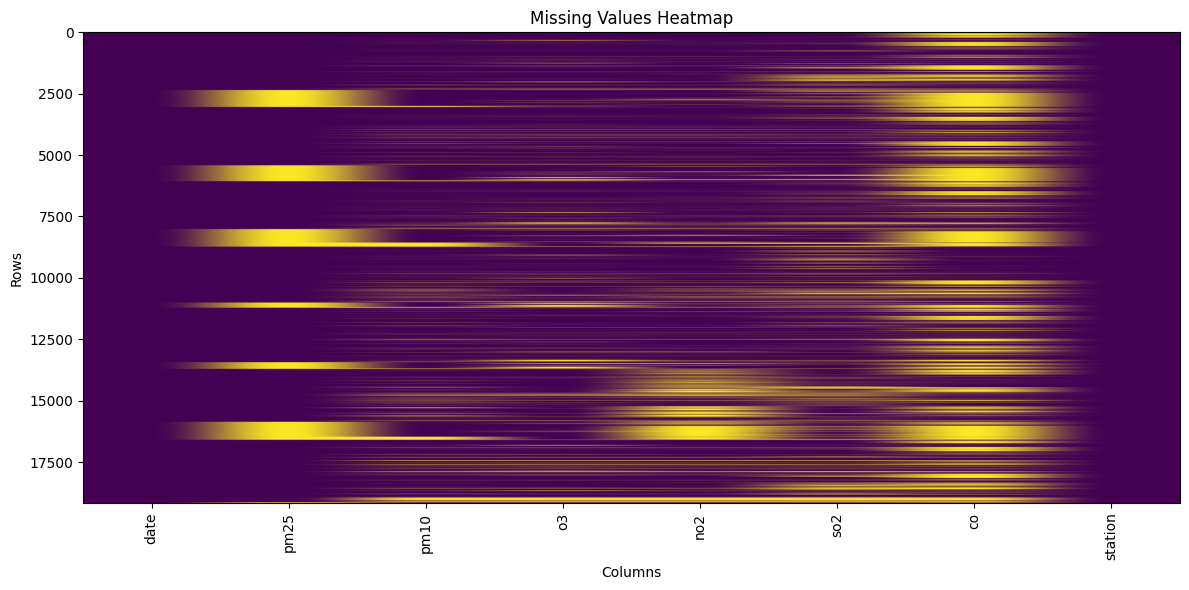

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(df.isna(), aspect='auto')
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.tight_layout()
plt.show()

# 4) Data Quality Checks

In [ ]:
# Check for duplicates
df.duplicated().sum()

# Check date consistency
pd.to_datetime(df['date'], errors='coerce').isna().sum()

np.int64(0)

# 5) Outlier Detection

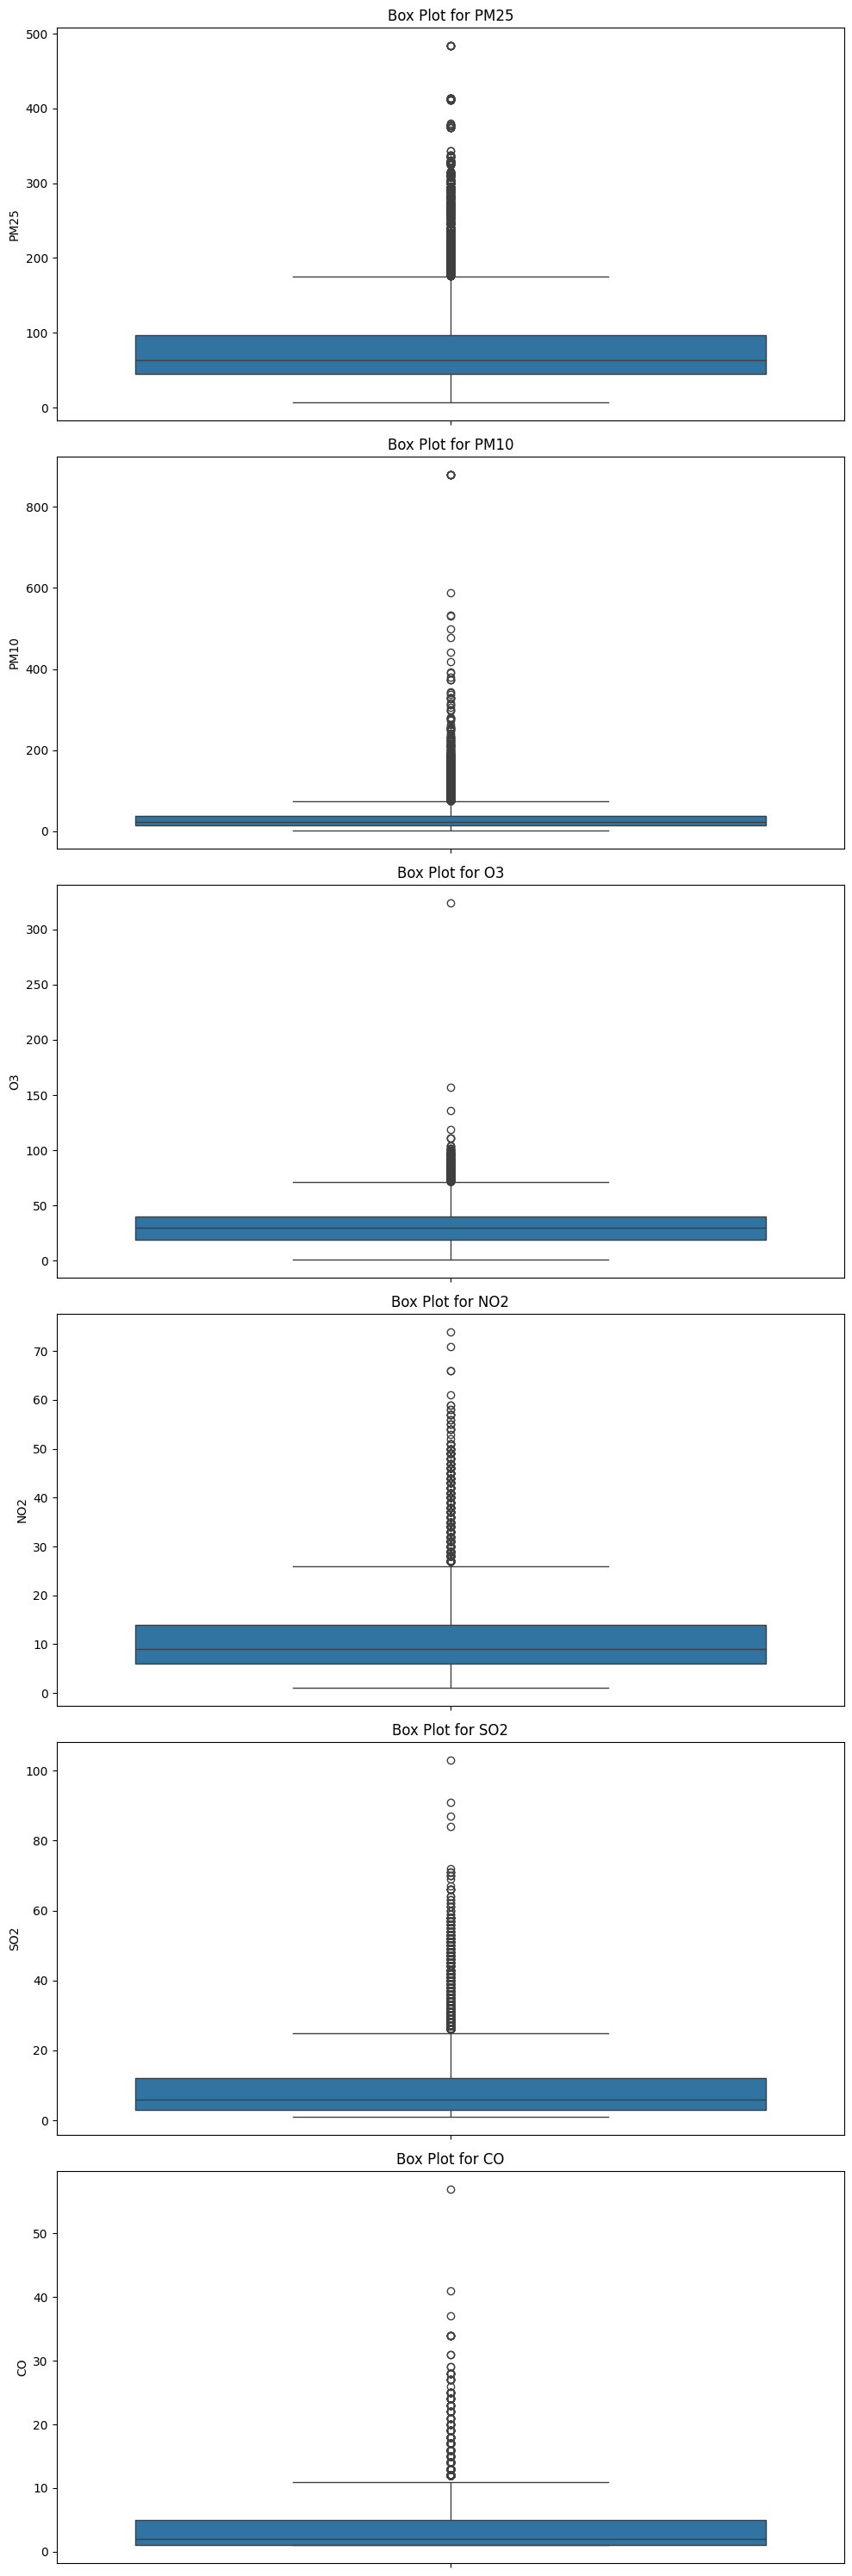

In [ ]:
import seaborn as sns

cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
num_cols = len(cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col.upper()}')
    axes[i].set_ylabel(col.upper())

plt.tight_layout()
plt.show()

Overall, the box plots show that pollutant concentrations are usually at moderate levels, but there are occasional high spikes. PM2.5 and PM10 have the largest spread and the most extreme outliers, meaning their values change a lot over time and can increase sharply during certain periods, such as heavy traffic or heating seasons. Ozone appears more stable, with higher values occurring only under specific conditions. NO₂, SO₂, and CO generally have low median values, but the presence of outliers suggests short-term increases caused by temporary emission sources. This indicates that air quality is mostly stable, but can deteriorate significantly during particular events.

# 6) Dataset Cleaning

In [ ]:
# Setup for data cleaning
import numpy as np
from datetime import datetime

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display current data
print(df.head(10))

# Calculate missing value percentages
total_rows = len(df)
missing_info = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_pct': df.isna().sum() / total_rows * 100
})
print("\nMissing values percentage per column:")
print(missing_info[['missing_pct']])

         date   pm25  pm10    o3   no2   so2   co  station
0   2025/11/1   65.0  22.0  40.0   9.0   2.0  NaN  Bjelave
1   2025/11/2   58.0  12.0  40.0  10.0   1.0  NaN  Bjelave
2   2025/11/3   32.0  21.0  24.0  10.0   5.0  1.0  Bjelave
3   2025/11/4   60.0  33.0  17.0  14.0   3.0  1.0  Bjelave
4   2025/11/5   79.0  47.0  14.0  17.0   4.0  3.0  Bjelave
5   2025/11/6  113.0  59.0  11.0  21.0   5.0  5.0  Bjelave
6   2025/11/7  136.0  48.0   7.0  16.0  27.0  4.0  Bjelave
7   2025/11/8  125.0  63.0   8.0  19.0  17.0  6.0  Bjelave
8   2025/11/9  151.0  39.0  29.0  15.0  12.0  5.0  Bjelave
9  2025/11/10  100.0  31.0  15.0  15.0  13.0  2.0  Bjelave

Missing values percentage per column:
         missing_pct
date        0.000000
pm25       17.198915
pm10        8.787310
o3         10.039658
no2        15.372574
so2        15.920476
co         43.811313
station     0.000000


## 6.1 Remove CO Column

In [ ]:
# Drop CO column due to excessive missing data (>40%)
df = df.drop('co', axis=1)



We have decided to remove the CO column entirely, as it provides no meaningful value for the intended analysis. The column contains an excessive amount of missing data (specifically, over 40% of its values are missing) and imputing these values (e.g., using medians) does not improve data quality or model performance. Instead, it introduces unnecessary noise into the dataset. Therefore, excluding the CO variable is the most appropriate and methodologically sound decision.


# 7) Create Temporal Features

In [ ]:
pollutant_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2']

# Convert date to datetime and create temporal features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("Years in dataset:", sorted(df['year'].unique()))
print("Seasons:", df['season'].unique())
print("Stations:", df['station'].unique())

Date range: 2016-11-07 00:00:00 to 2025-11-19 00:00:00
Years in dataset: [np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Seasons: ['Fall' 'Summer' 'Spring' 'Winter']
Stations: ['Bjelave' 'Otoka' 'Ilidza' 'Vijecnica' 'Ilijas' 'Ivan Sedlo' 'US Embassy']


# 8) Hierarchical Imputation for Missing Values

In [ ]:
def impute_missing_values(df, column):
    """
    Hierarchical imputation:
    1. Same year + season + station
    2. Same season + station
    3. Same station
    4. Overall median
    """
    df_imputed = df.copy()

    # Level 1: year + season + station
    for year in df_imputed['year'].unique():
        for season in df_imputed['season'].unique():
            for station in df_imputed['station'].unique():
                mask = (df_imputed['year'] == year) & (df_imputed['season'] == season) & (df_imputed['station'] == station)
                group_data = df_imputed.loc[mask, column]
                if group_data.notna().sum() > 0:
                    median_val = group_data.median()
                    null_mask = mask & df_imputed[column].isna()
                    df_imputed.loc[null_mask, column] = median_val

    # Level 2: season + station
    for season in df_imputed['season'].unique():
        for station in df_imputed['station'].unique():
            mask = (df_imputed['season'] == season) & (df_imputed['station'] == station)
            group_data = df_imputed.loc[mask, column]
            if group_data.notna().sum() > 0:
                median_val = group_data.median()
                null_mask = mask & df_imputed[column].isna()
                df_imputed.loc[null_mask, column] = median_val

    # Level 3: station only
    for station in df_imputed['station'].unique():
        mask = df_imputed['station'] == station
        group_data = df_imputed.loc[mask, column]
        if group_data.notna().sum() > 0:
            median_val = group_data.median()
            null_mask = mask & df_imputed[column].isna()
            df_imputed.loc[null_mask, column] = median_val

    # Level 4: overall median
    if df_imputed[column].isna().sum() > 0:
        overall_median = df_imputed[column].median()
        df_imputed[column].fillna(overall_median, inplace=True)

    return df_imputed[column]

# Apply imputation
for col in pollutant_cols:
    if df[col].isna().sum() > 0:
        df[col] = impute_missing_values(df, col)

print("Final missing values in pollutant columns:", df[pollutant_cols].isna().sum().sum())

Final missing values in pollutant columns: 0


# 9) Univariate Exploratory Data Analysis

## 9.1 Pollutant Distributions

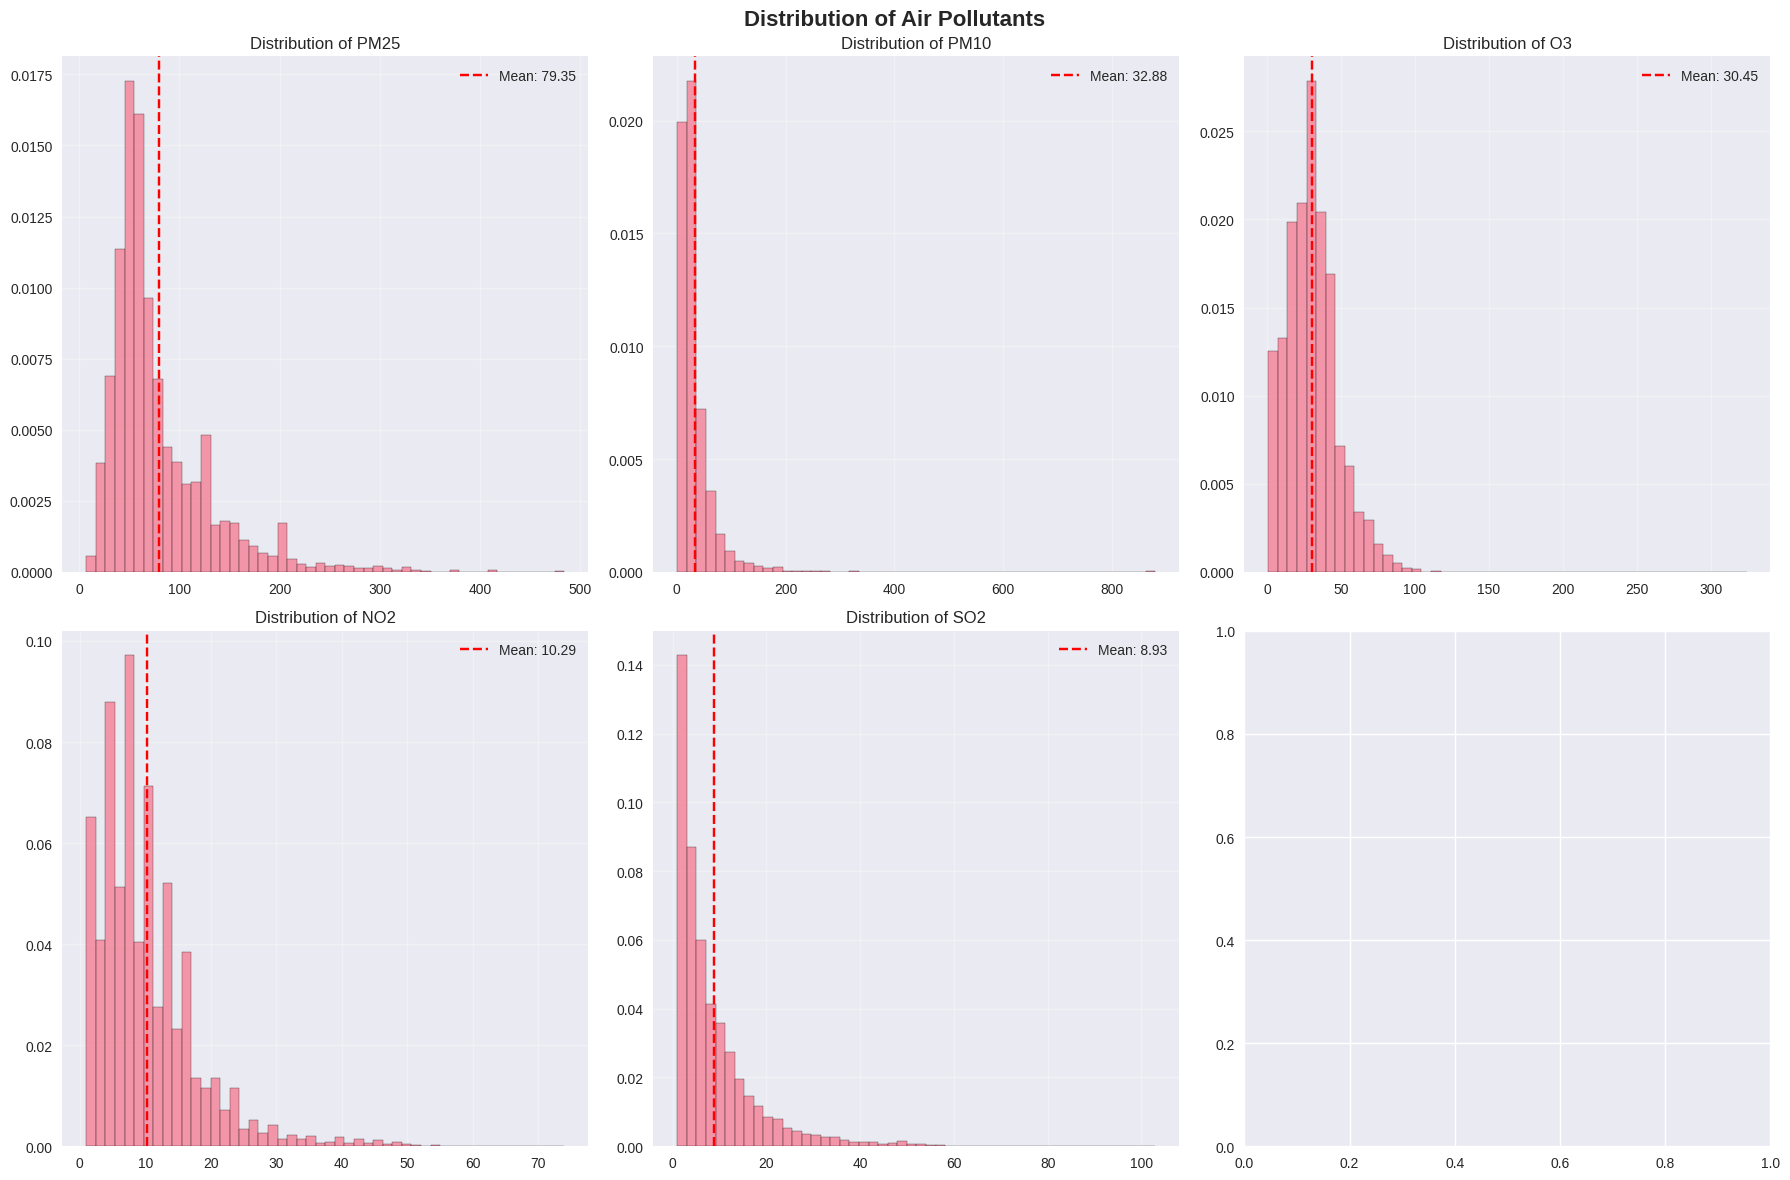

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Air Pollutants', fontsize=16, fontweight='bold')

for i, col in enumerate(pollutant_cols):
    row, col_idx = i // 3, i % 3
    axes[row, col_idx].hist(df[col], bins=50, alpha=0.7, edgecolor='black', density=True)
    axes[row, col_idx].set_title(f'Distribution of {col.upper()}')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[row, col_idx].legend()
    axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 9.2 Statistical Summaries

In [ ]:
print("\nDetailed Statistical Summary for Each Pollutant:")
for col in pollutant_cols:
    print(f"\n--- {col.upper()} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"25th percentile: {df[col].quantile(0.25):.2f}")
    print(f"75th percentile: {df[col].quantile(0.75):.2f}")
    print(f"Skewness: {df[col].skew():.2f}")


Detailed Statistical Summary for Each Pollutant:

--- PM25 ---
Mean: 79.35
Median: 62.00
Standard Deviation: 51.79
Min: 7.00
Max: 484.00
25th percentile: 48.00
75th percentile: 97.00
Skewness: 2.09

--- PM10 ---
Mean: 32.88
Median: 24.00
Standard Deviation: 34.72
Min: 1.00
Max: 880.00
25th percentile: 16.00
75th percentile: 38.00
Skewness: 7.78

--- O3 ---
Mean: 30.45
Median: 29.00
Standard Deviation: 17.29
Min: 1.00
Max: 324.00
25th percentile: 18.00
75th percentile: 40.00
Skewness: 0.98

--- NO2 ---
Mean: 10.29
Median: 9.00
Standard Deviation: 7.69
Min: 1.00
Max: 74.00
25th percentile: 5.00
75th percentile: 14.00
Skewness: 1.86

--- SO2 ---
Mean: 8.93
Median: 6.00
Standard Deviation: 9.01
Min: 1.00
Max: 103.00
25th percentile: 3.00
75th percentile: 12.00
Skewness: 2.43


## 9.3 Data Distribution by Station

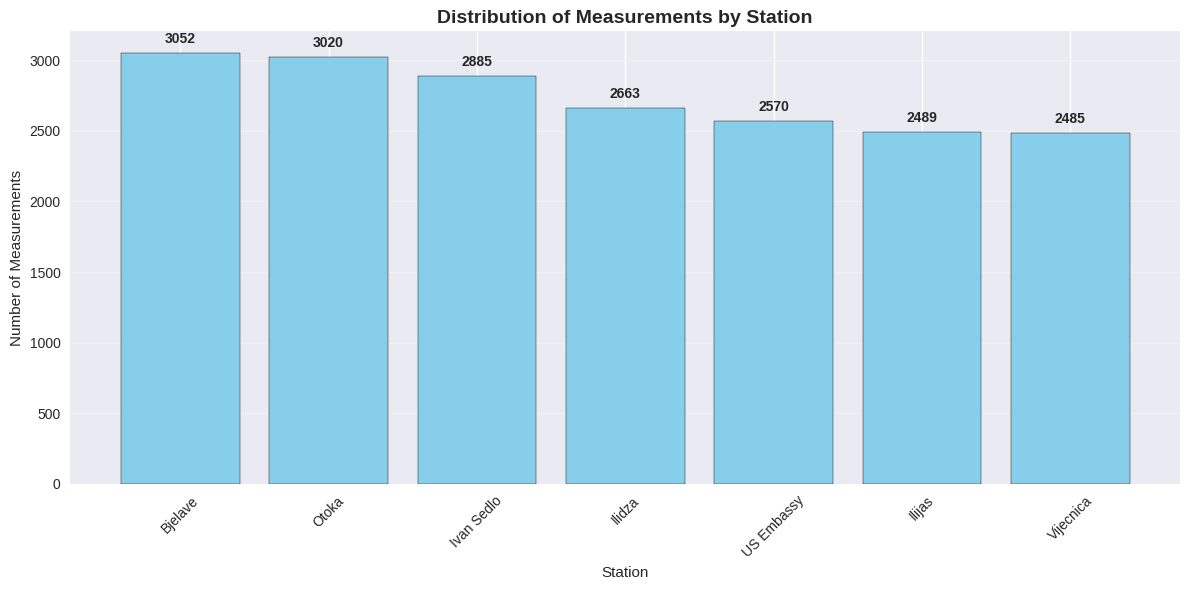

In [ ]:
plt.figure(figsize=(12, 6))
station_counts = df['station'].value_counts()
plt.bar(station_counts.index, station_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Measurements by Station', fontsize=14, fontweight='bold')
plt.xlabel('Station')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(station_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 9.4 Temporal Distribution Analysis

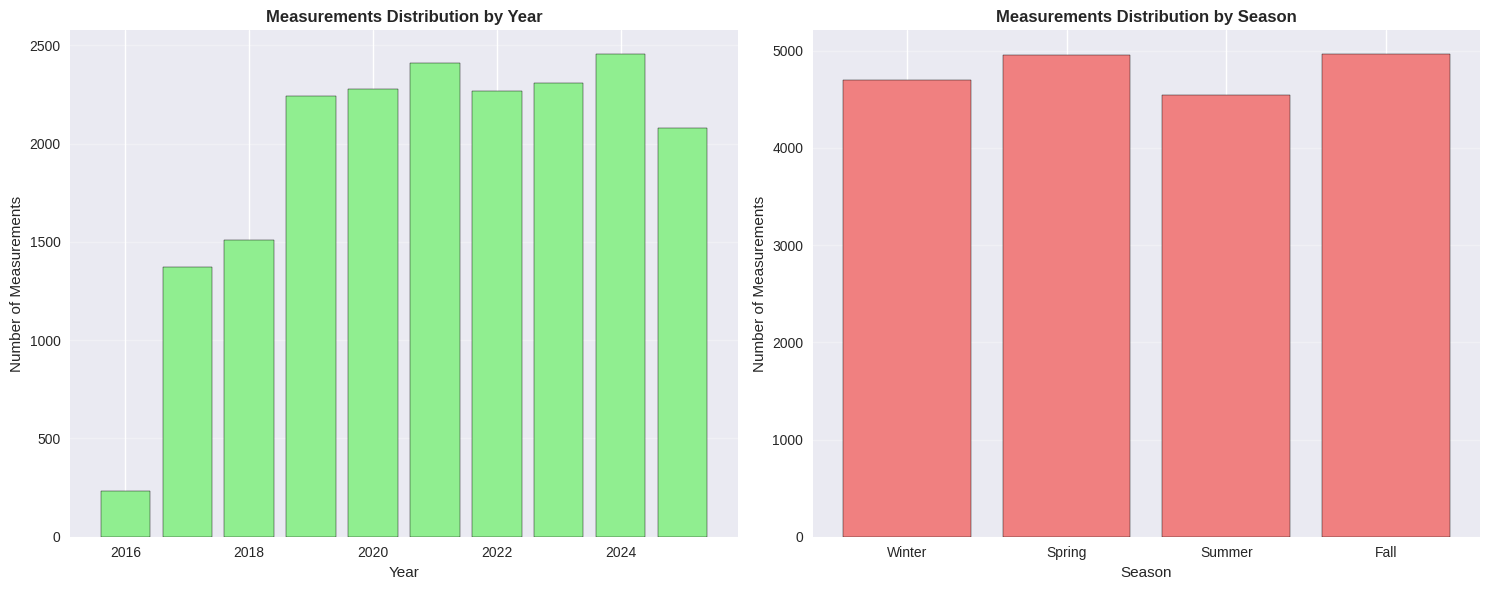

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# By year
year_counts = df['year'].value_counts().sort_index()
ax1.bar(year_counts.index, year_counts.values, color='lightgreen', edgecolor='black')
ax1.set_title('Measurements Distribution by Year', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Measurements')
ax1.grid(axis='y', alpha=0.3)

# By season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = df['season'].value_counts().reindex(season_order)
ax2.bar(season_counts.index, season_counts.values, color='lightcoral', edgecolor='black')
ax2.set_title('Measurements Distribution by Season', fontweight='bold')
ax2.set_xlabel('Season')
ax2.set_ylabel('Number of Measurements')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9.5 Correlation Analysis

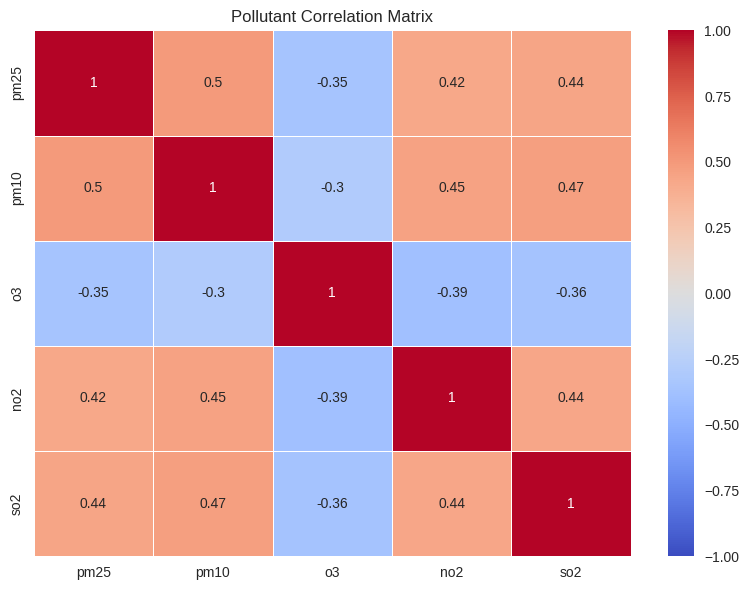


Correlation of PM2.5 and PM10 with other pollutants:

PM25:
  O3  : -0.355
  NO2 : 0.423
  SO2 : 0.440

PM10:
  O3  : -0.296
  NO2 : 0.455
  SO2 : 0.473


In [ ]:
# Calculate correlation matrix for pollutants
pollutants = df[['pm25', 'pm10', 'o3', 'no2', 'so2']]
corr_matrix = pollutants.corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Pollutant Correlation Matrix")
plt.tight_layout()
plt.show()

# Specific correlations between PM2.5/PM10 and other pollutants
print("\nCorrelation of PM2.5 and PM10 with other pollutants:")
for target in ['pm25', 'pm10']:
    print(f"\n{target.upper()}:")
    for predictor in ['o3', 'no2', 'so2']:
        corr_val = df[[target, predictor]].corr().iloc[0, 1]
        print(f"  {predictor.upper():<4}: {corr_val:.3f}")

**Correlation of PM2.5​ & PM10​ with Other Pollutants**  
<br>


*   **Positive Correlation (NO2​, SO2​):** Both PM2.5​ and PM10​ show a moderate positive correlation with **NO2**​ (up to 0.45) and **SO2**​ (up to 0.47). This is a critical finding, as these pollutants often share common combustion sources, such as vehicle traffic and fossil fuel burning for heating. This co-occurrence makes NO2​ and SO2​ excellent candidates for predictive features.
*   **Negative Correlation (O3​):** Both PM2.5​ (−0.35) and PM10​ (−0.30) show a moderate negative correlation with O3​. This inverse relationship is typical, as high PM and its precursors often deplete O3​ in the surface layer, and high O3​ levels are common during sunny, well-ventilated conditions that favor PM dispersion.
*   **PM2.5​ vs. PM10​:** The correlation between the two particle sizes is a moderate 0.50, confirming that while they are related (as PM2.5​ is a subset of PM10​), they are distinct phenomena, with approximately half of the PM10​ variability being explained by PM2.5​ variability.







## 9.6 Station-to-Station Correlation

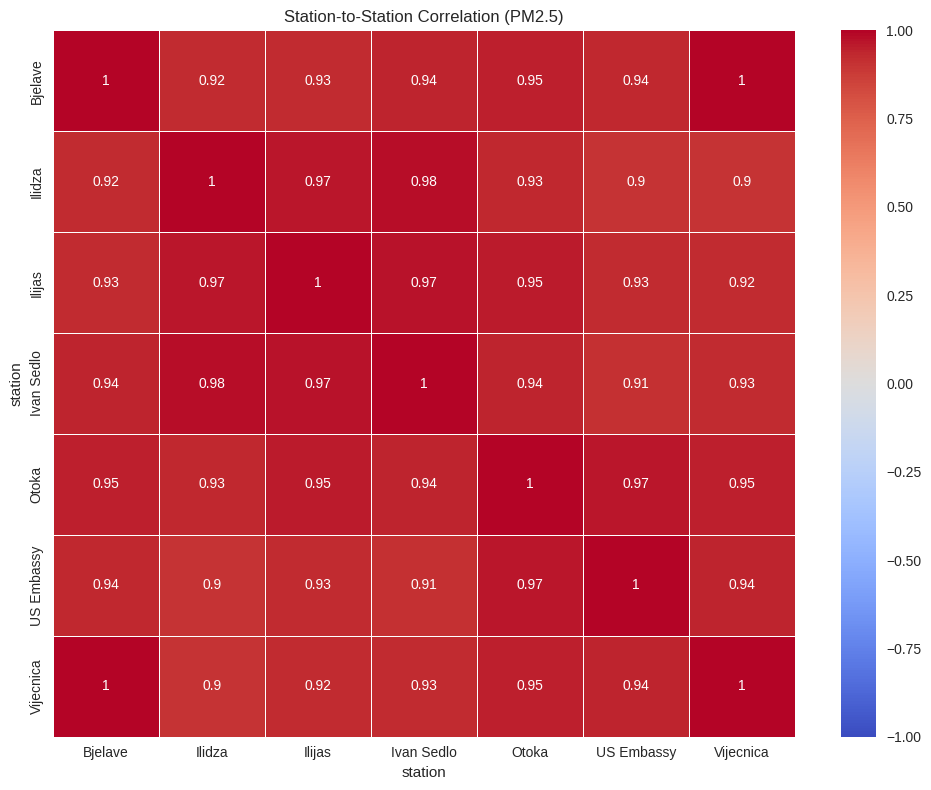

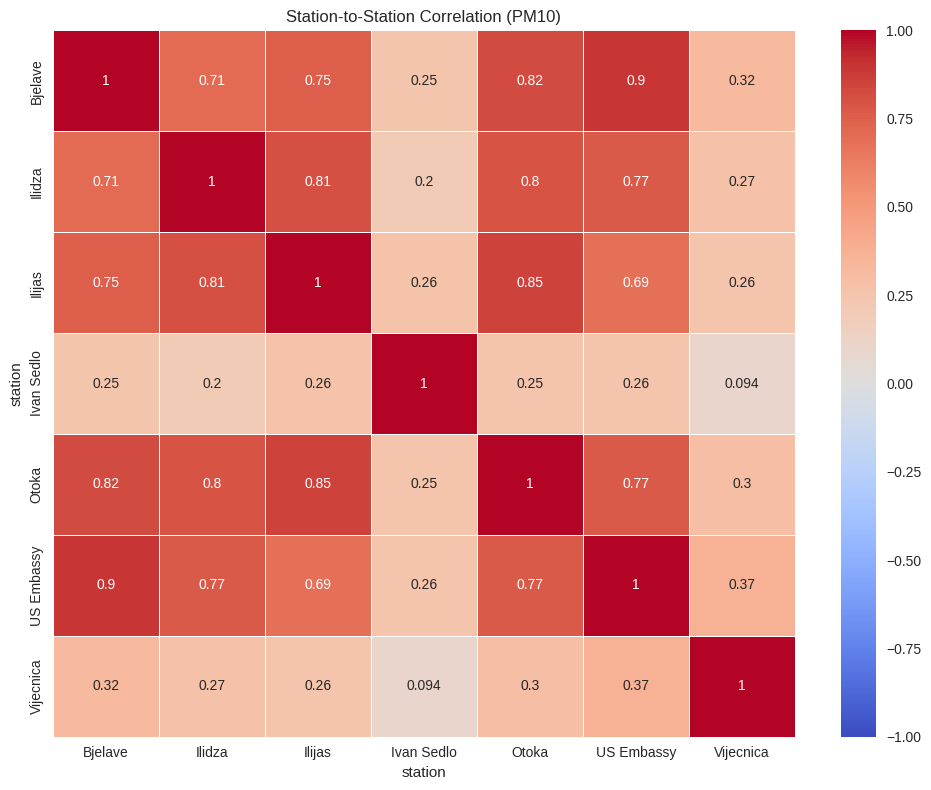

In [ ]:
# PM2.5 station correlations
pm25_pivot = df.pivot_table(index='date', columns='station', values='pm25')
pm25_station_corr = pm25_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    pm25_station_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Station-to-Station Correlation (PM2.5)")
plt.tight_layout()
plt.show()

# PM10 station correlations
pm10_pivot = df.pivot_table(index='date', columns='station', values='pm10')
pm10_station_corr = pm10_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    pm10_station_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Station-to-Station Correlation (PM10)")
plt.tight_layout()
plt.show()

**Station-to-Station Correlation (PM2.5​)** : <br>

This matrix displays an extremely high degree of positive correlation between all seven monitoring stations. The correlation coefficients range almost exclusively from 0.91 to 1.00. This indicates that PM2.5​ levels are highly synchronized and geographically homogeneous across the entire Sarajevo area. When PM2.5​ rises or falls at one station, it tends to do so simultaneously at all others. This suggests that the PM2.5​ pollution is driven primarily by regional sources (like widespread household heating or general weather patterns) rather than highly localized, immediate sources.

**Station-to-Station Correlation (PM10​):** <br>

The correlation structure for PM10​ is more varied compared to PM2.5​. While most stations show moderate-to-high positive correlation (typically 0.71 to 0.90), the Ivan Sedlo station exhibits a notably weak correlation with all other stations, with coefficients ranging from a low of 0.094 to 0.37. This stark difference suggests that PM10​ (which includes coarser particles often linked to resuspension, construction, or specific local industrial sources) is more influenced by highly localized factors and geography than PM2.5​. The poor correlation of Ivan Sedlo is particularly relevant, suggesting its AQI is driven by distinct local or meteorological conditions, potentially due to its higher elevation or distance from the main city basin.

## 9.7 Temporal Patterns Analysis

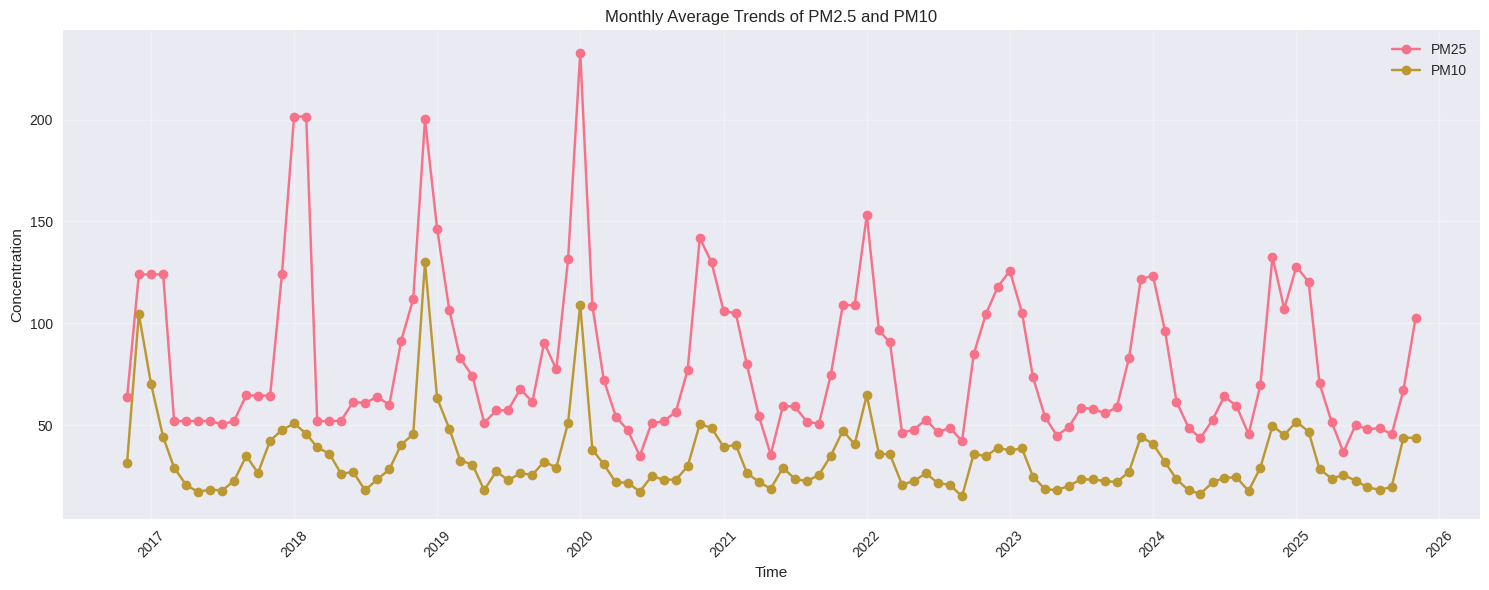

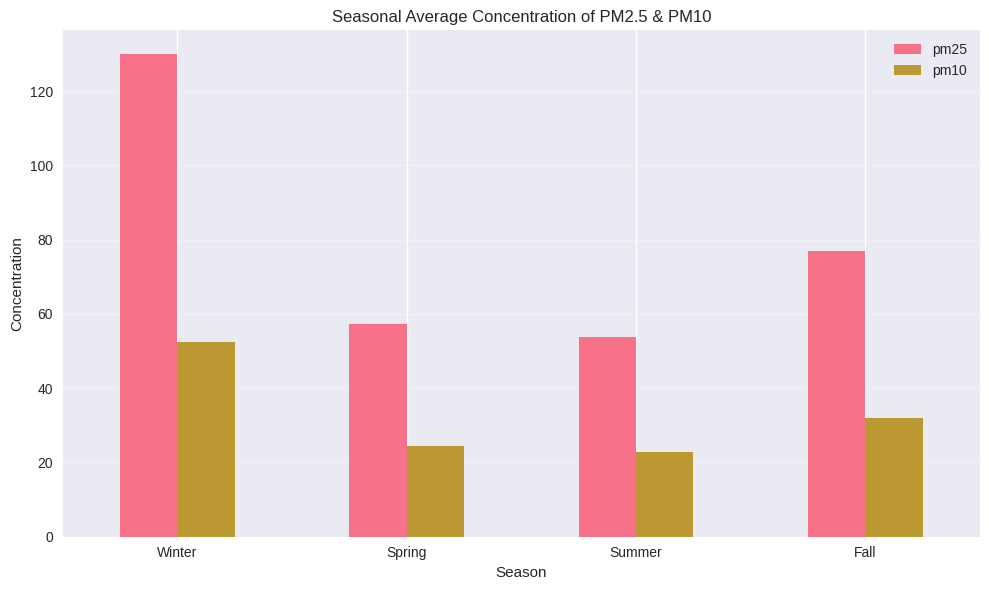

In [ ]:
# Monthly trends
df['year_month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby(['year', 'month'])[['pm25', 'pm10']].mean().reset_index()
monthly_trends['year_month'] = pd.to_datetime(monthly_trends[['year', 'month']].assign(day=1))

plt.figure(figsize=(15, 6))
for target in ['pm25', 'pm10']:
    plt.plot(monthly_trends['year_month'], monthly_trends[target], marker='o', label=target.upper())

plt.title("Monthly Average Trends of PM2.5 and PM10")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seasonal patterns
seasonal_trends = df.groupby('season')[['pm25', 'pm10']].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
seasonal_trends.plot(kind='bar', figsize=(10,6))
plt.title("Seasonal Average Concentration of PM2.5 & PM10")
plt.ylabel("Concentration")
plt.xlabel("Season")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

PM2.5 is spread fairly evenly across the region and shows a strong similarity between different locations (correlation > 0.90). PM10, on the other hand, varies more from place to place. To predict air pollution, NO2 and SO2 are useful indicators because they come from the same sources, like combustion (correlation 0.42–0.47). The pollution levels follow a clear seasonal pattern, with peaks in winter, and overall, they have slowly decreased since 2016.

## 9.8 Spatial Analysis

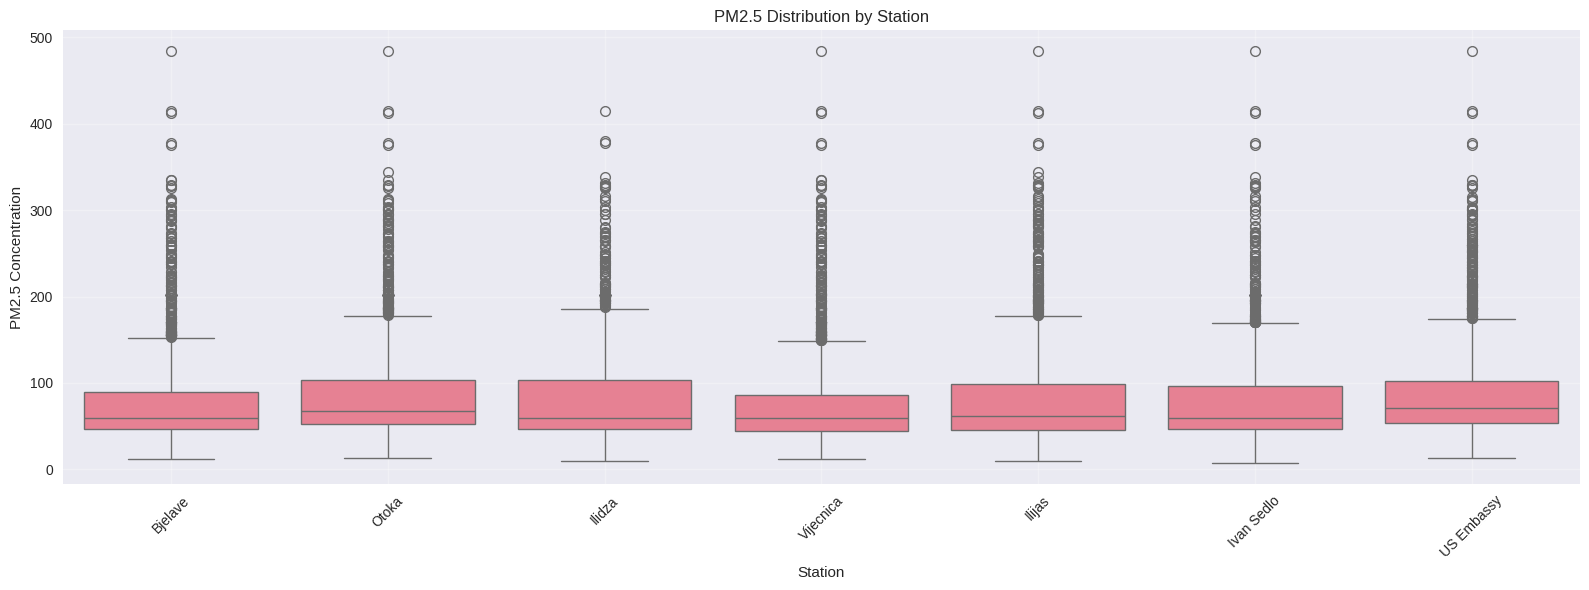

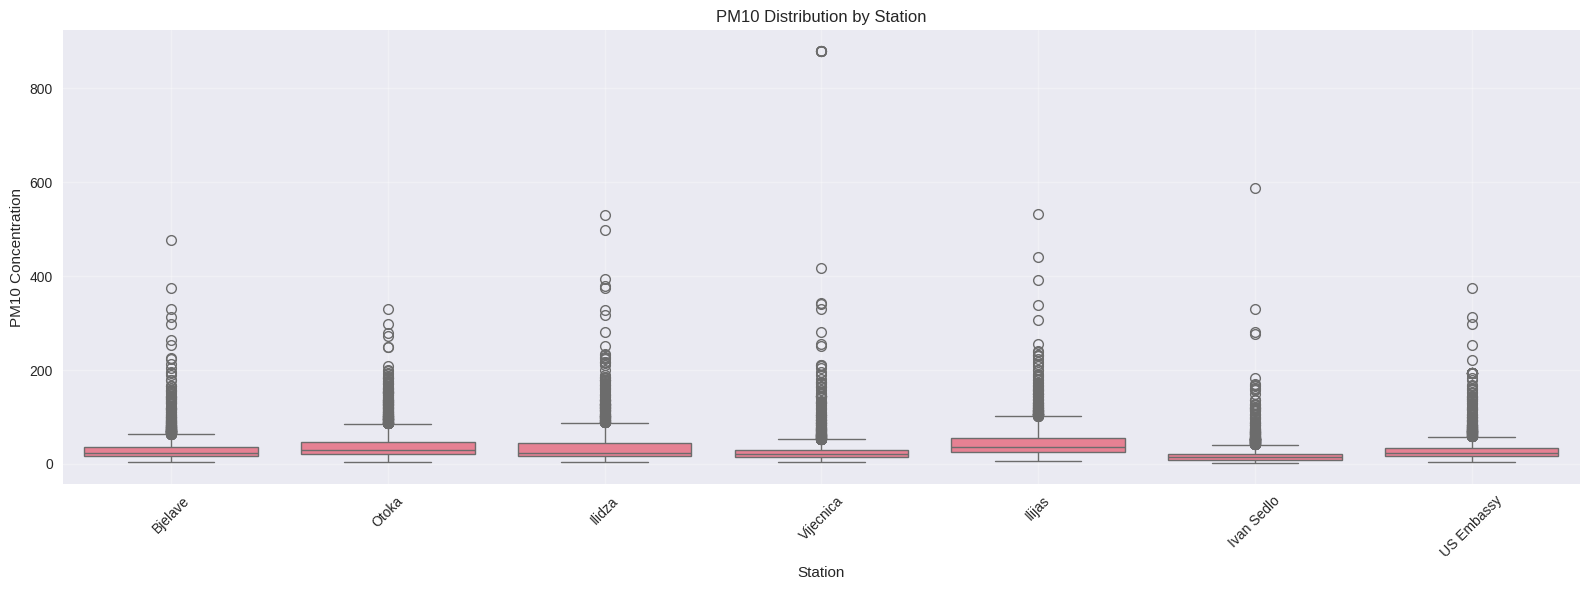

Average PM2.5 and PM10 per station:
                 pm25       pm10
station                         
US Embassy  85.819261  30.483268
Otoka       83.966887  38.470861
Ilijas      80.472680  45.568301
Ilidza      79.390349  36.790462
Ivan Sedlo  77.243154  19.702426
Bjelave     74.895478  30.375819
Vijecnica   73.760563  30.037827


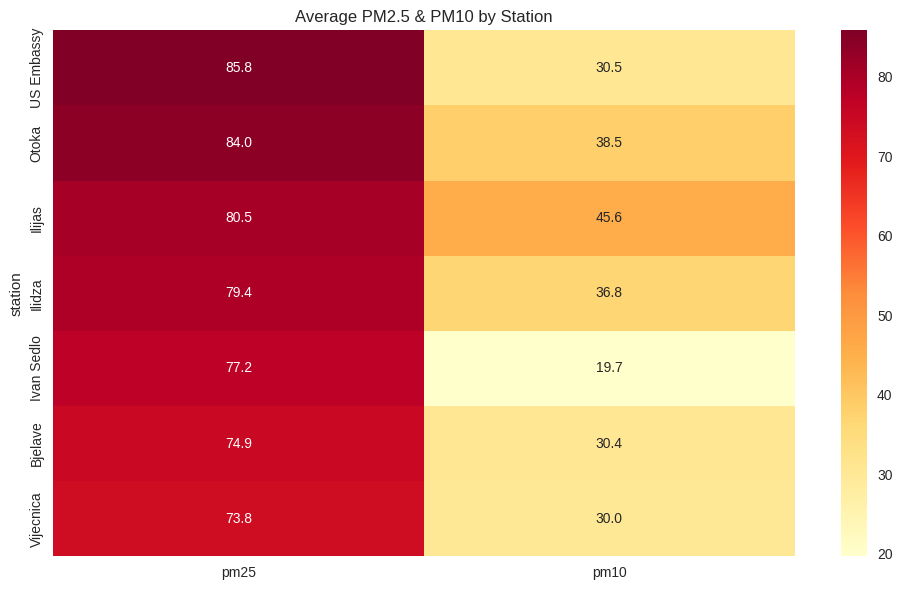

In [ ]:
# Box plots by station
plt.figure(figsize=(16,6))
sns.boxplot(x='station', y='pm25', data=df)
plt.title("PM2.5 Distribution by Station")
plt.xlabel("Station")
plt.ylabel("PM2.5 Concentration")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))
sns.boxplot(x='station', y='pm10', data=df)
plt.title("PM10 Distribution by Station")
plt.xlabel("Station")
plt.ylabel("PM10 Concentration")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Average concentration per station
station_avg = df.groupby('station')[['pm25', 'pm10']].mean().sort_values('pm25', ascending=False)
print("Average PM2.5 and PM10 per station:")
print(station_avg)

# Heatmap of station averages
plt.figure(figsize=(10,6))
sns.heatmap(station_avg, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title("Average PM2.5 & PM10 by Station")
plt.tight_layout()
plt.show()

PM2.5 levels are fairly similar across all stations, ranging from about 74.9 to 85.8 µg/m³, with the US Embassy recording the highest average. PM10 levels vary more, from around 19.7 to 45.6 µg/m³, with Ilijas showing the highest average and Ivan Sedlo the lowest.

# 10) Save Cleaned Dataset

In [ ]:
# Final data quality check
print("\nFinal Data Quality Check:")
print(f"Total records: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Stations: {len(df['station'].unique())}")
print("\nMissing values in final dataset:")
print(df.isna().sum())

# Save cleaned dataset
df.to_csv('cleaned_air_quality_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_air_quality_data.csv'")